In [67]:
import matplotlib.pyplot as plt
from pylab import rcParams

import numpy as np
import pandas as pd
import scipy.stats as stats

import pickle
import json

# Testing script results

In [321]:
with open('data/400_Hubble_Omega_l_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)

In [322]:
sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

In [323]:
out['Ratio'] = [10/(1 + 24.4*np.exp(i)) for i in out['Ratio']]

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_5496\1227533897.py:1: RuntimeWarning: overflow encountered in exp
  out['Ratio'] = [10/(1 + 24.4*np.exp(i)) for i in out['Ratio']]
C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_5496\1227533897.py:1: RuntimeWarning: overflow encountered in double_scalars
  out['Ratio'] = [10/(1 + 24.4*np.exp(i)) for i in out['Ratio']]


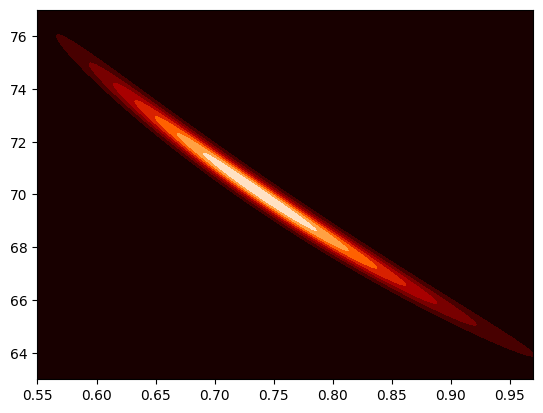

In [325]:
plt.tricontourf(out['Omega_l'][1::], out['Hubble'][1::], out['Ratio'][1::], cmap = 'gist_heat')

# plt.xlim(0.55, 0.97)
# plt.ylim(63, 77)
plt.show()

# Alternative of grid generating

## Generating a grid centered in a seed value

In [38]:
def generate_grid(x, y, z): #(Omega_Lambda, Omega_matter, Hubble)
    for i in x:
        for j in y:
            for k in z:
                yield (i, j, k)

In [41]:
def free_params_parser(config, grid_size):
    if "Hubble" not in config['free']:
        _grid = generate_grid(
            np.linspace(config['grid']['Omega_l'][0], config['grid']['Omega_l'][1], grid_size), 
            np.linspace(config['grid']['Omega_m'][0], config['grid']['Omega_m'][1], grid_size), 
            [config['minimum'][2]],
        )
        return _grid
    elif "Omega_l" not in config['free']:
        _grid = generate_grid(
            [config['minimum'][0]], 
            np.linspace(config['grid']['Omega_m'][0], config['grid']['Omega_m'][1], grid_size), 
            np.linspace(config['grid']['Hubble'][0], config['grid']['Hubble'][1], grid_size),
        )
        return _grid
    elif "Omega_m" not in config['free']:
        _grid = generate_grid(
            np.linspace(config['grid']['Omega_l'][0], config['grid']['Omega_l'][1], grid_size),
            [config['minimum'][1]],
            np.linspace(config['grid']['Hubble'][0], config['grid']['Hubble'][1], grid_size),
        )
        return _grid

In [42]:
with open('config/likelihood_ratio_config.json') as f:
    config = json.load(f)
    
config['minimum'] = [ 0.73654492,  0.26206903, 70.11226543]

for i in free_params_parser(config, 10):
    print(i)

(0.0, 0.26206903, 50.0)
(0.0, 0.26206903, 53.333333333333336)
(0.0, 0.26206903, 56.666666666666664)
(0.0, 0.26206903, 60.0)
(0.0, 0.26206903, 63.333333333333336)
(0.0, 0.26206903, 66.66666666666667)
(0.0, 0.26206903, 70.0)
(0.0, 0.26206903, 73.33333333333334)
(0.0, 0.26206903, 76.66666666666667)
(0.0, 0.26206903, 80.0)
(0.1111111111111111, 0.26206903, 50.0)
(0.1111111111111111, 0.26206903, 53.333333333333336)
(0.1111111111111111, 0.26206903, 56.666666666666664)
(0.1111111111111111, 0.26206903, 60.0)
(0.1111111111111111, 0.26206903, 63.333333333333336)
(0.1111111111111111, 0.26206903, 66.66666666666667)
(0.1111111111111111, 0.26206903, 70.0)
(0.1111111111111111, 0.26206903, 73.33333333333334)
(0.1111111111111111, 0.26206903, 76.66666666666667)
(0.1111111111111111, 0.26206903, 80.0)
(0.2222222222222222, 0.26206903, 50.0)
(0.2222222222222222, 0.26206903, 53.333333333333336)
(0.2222222222222222, 0.26206903, 56.666666666666664)
(0.2222222222222222, 0.26206903, 60.0)
(0.2222222222222222, 0.2